In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("../configs")
from matplot import matplot_config, tex_config

# import matplotlib
# matplotlib.rcParams.update(matplot_config)
# matplotlib.use("pgf")
# matplotlib.rcParams.update(tex_config)

# Wong colors:
color_palette = "e69f00 56b4e9 009e73 f0e442 0072b2 d55e00 cc79a7".split()
color_palette = [f"#{c}" for c in color_palette]

def plot_comprate(df, figname=None):
    fig, ax = plt.subplots()
    ax.set_xlabel('Length')
    ax.set_ylabel('Samples')
    ax.grid(True)
    for i in range(len(df.columns)):
        length = df.iloc[:, i].str.len()
        color = color_palette[i]
        ax.hist(length, 50, density=False, facecolor=color, alpha=0.6)
    ax.legend(df.columns)

    # save plt:
    # fig = plt.gcf()
    # fig.savefig(figname, format="pgf", bbox_inches="tight")
    plt.show()


en-no-0.5.train.csv


<Figure size 640x480 with 0 Axes>

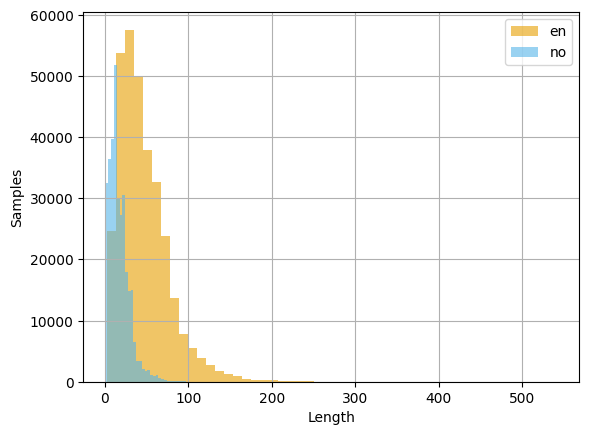

en-no-1.0.train.csv


<Figure size 640x480 with 0 Axes>

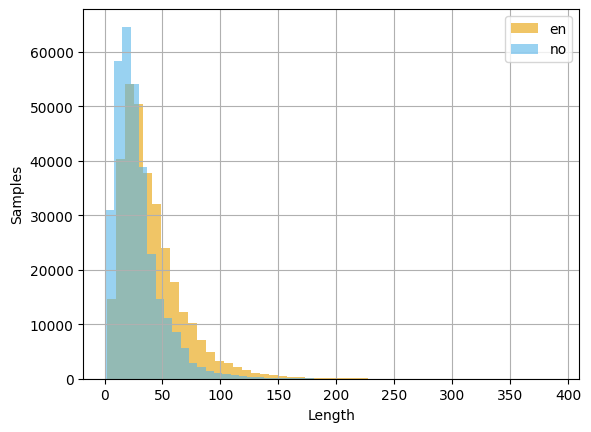

In [5]:
import os
lang = "no"
dfs = sorted(os.listdir("opensubtitles/compressed/"))
dfs = [df for df in dfs if f"-{lang}-" in df]

to_save = [0.5, 1.0]

for df in dfs:
    if not any(str(x) in df for x in to_save):
        continue
    if "train" not in df:
        continue
    print(df)
    plt.clf()
    df = pd.read_csv(f"opensubtitles/compressed/{df}")
    plot_comprate(df)

In [27]:
import numpy as np

dfs = sorted(os.listdir("opensubtitles/compressed/"))
compression_rates = np.arange(0.5, 1.05, 0.1)
compression_rates = [float(f"{x:.1f}") for x in compression_rates]

grouped = {}
for comp_rate in compression_rates:
    _dfs = [df for df in dfs if f"{comp_rate}.train" in df]
    grouped[comp_rate] = _dfs

csvs = grouped[0.5]

In [19]:

def merge(csv_group):
    english_mean = pd.DataFrame()
    lengths = {}
    for csv in csv_group:
        print(csv)
        df = pd.read_csv(f"opensubtitles/compressed/{csv}")
        en = df.iloc[:, 0]
        english_mean = pd.concat([english_mean, en], axis=1)
        lang_len = df.iloc[:, -1].str.len()
        lengths[df.columns[-1]] = lang_len
    
    lengths["en"] = english_mean.iloc[:, 0].str.len()
    return lengths
lengths = merge(csvs)

en-fr-0.5.train.csv
en-hu-0.5.train.csv
en-ja-0.5.train.csv
en-ko-0.5.train.csv
en-no-0.5.train.csv
en-pl-0.5.train.csv


In [26]:
length_df = pd.DataFrame(lengths)
length_df

,fr,hu,ja,ko,no,pl,en
0,23,13,9.0,3.0,19,18,56
1,8,20,14.0,11.0,5,6,19
2,9,12,11.0,17.0,53,14,26
3,15,3,1.0,2.0,9,7,28
4,21,5,12.0,2.0,25,9,54
...,...,...,...,...,...,...,...
319995,23,16,NaN,NaN,26,17,50
319996,31,5,NaN,NaN,20,9,69
319997,24,6,NaN,NaN,9,9,59
319998,6,11,NaN,NaN,6,8,30


                                                  en  \
0  can I feed peanuts to the elephants at your we...   
1  of course there'll be elephants it's a stereot...   
2  thank you Penny and Leonard I was kind of hopi...   
3  yeah it's just we haven't done it yet and I th...   
4  it doesn't have to be tonight how about this w...   

                                                  no  
0                   Får jeg gi elefantene peanøtter?  
1                    Jo, men de får ingen peanøtter.  
2                    Jeg vil sitte med Anu, Leonard.  
3  Vi bør sjekke at vi passer sammen før vi gifte...  
4  Det må ikke skje i kveld. Jeg kan ordne rom på...  


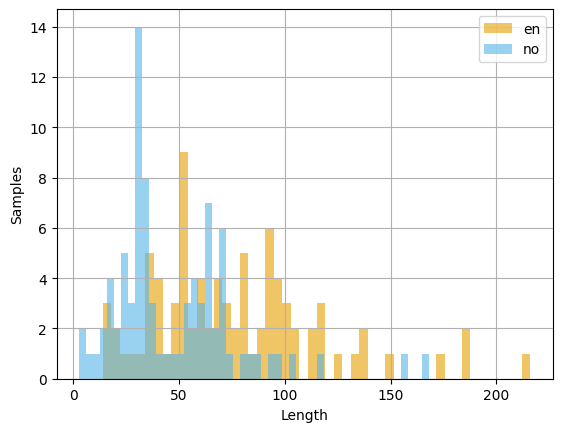

In [15]:
# bbt data
bbt_df = pd.read_csv("big-bang-theory-all.csv", sep="|")
print(bbt_df.head())
plot_comprate(bbt_df, figname="figures/length_bbt.pgf")